In [8]:
from torch.autograd import Variable
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import random

In [9]:
price_data = pd.read_csv(open('dataset.csv'))
all_data = price_data.iloc[1:,2:3].values
train_data = price_data.iloc[1:151,2:3].values
test_data = price_data.iloc[1:152,2:3].values
train_data2 = price_data.iloc[2:222,2:3].values
print(train_data2.size)

220


rnn 重要参考资料：
https://docs.google.com/presentation/d/17VUX7YXhMkJrqO5gNGh6EE5gzBpY-BF9IrfVKcFIb3A/edit#slide=id.g27e9c2914b_0_67

odict_keys(['rnn_a.weight_ih_l0', 'rnn_a.weight_hh_l0', 'rnn_a.bias_ih_l0', 'rnn_a.bias_hh_l0', 'rnn_b.weight_ih_l0', 'rnn_b.weight_hh_l0', 'rnn_b.bias_ih_l0', 'rnn_b.bias_hh_l0', 'linear.weight', 'linear.bias'])
rnn_a.weight_ih_l0 corresponds to [
 0.9070
[torch.FloatTensor of size 1]
]
rnn_a.weight_hh_l0 corresponds to [
1.00000e-02 *
  4.9094
[torch.FloatTensor of size 1]
]
rnn_a.bias_ih_l0 corresponds to [-0.17628812789916992]
rnn_a.bias_hh_l0 corresponds to [-0.014043927192687988]
rnn_b.weight_ih_l0 corresponds to [
 0.5955
[torch.FloatTensor of size 1]
]
rnn_b.weight_hh_l0 corresponds to [
 0.9738
[torch.FloatTensor of size 1]
]
rnn_b.bias_ih_l0 corresponds to [-0.5097390413284302]
rnn_b.bias_hh_l0 corresponds to [-0.22510766983032227]
linear.weight corresponds to [
 0.2923
[torch.FloatTensor of size 1]
]
linear.bias corresponds to [-0.5459043979644775]


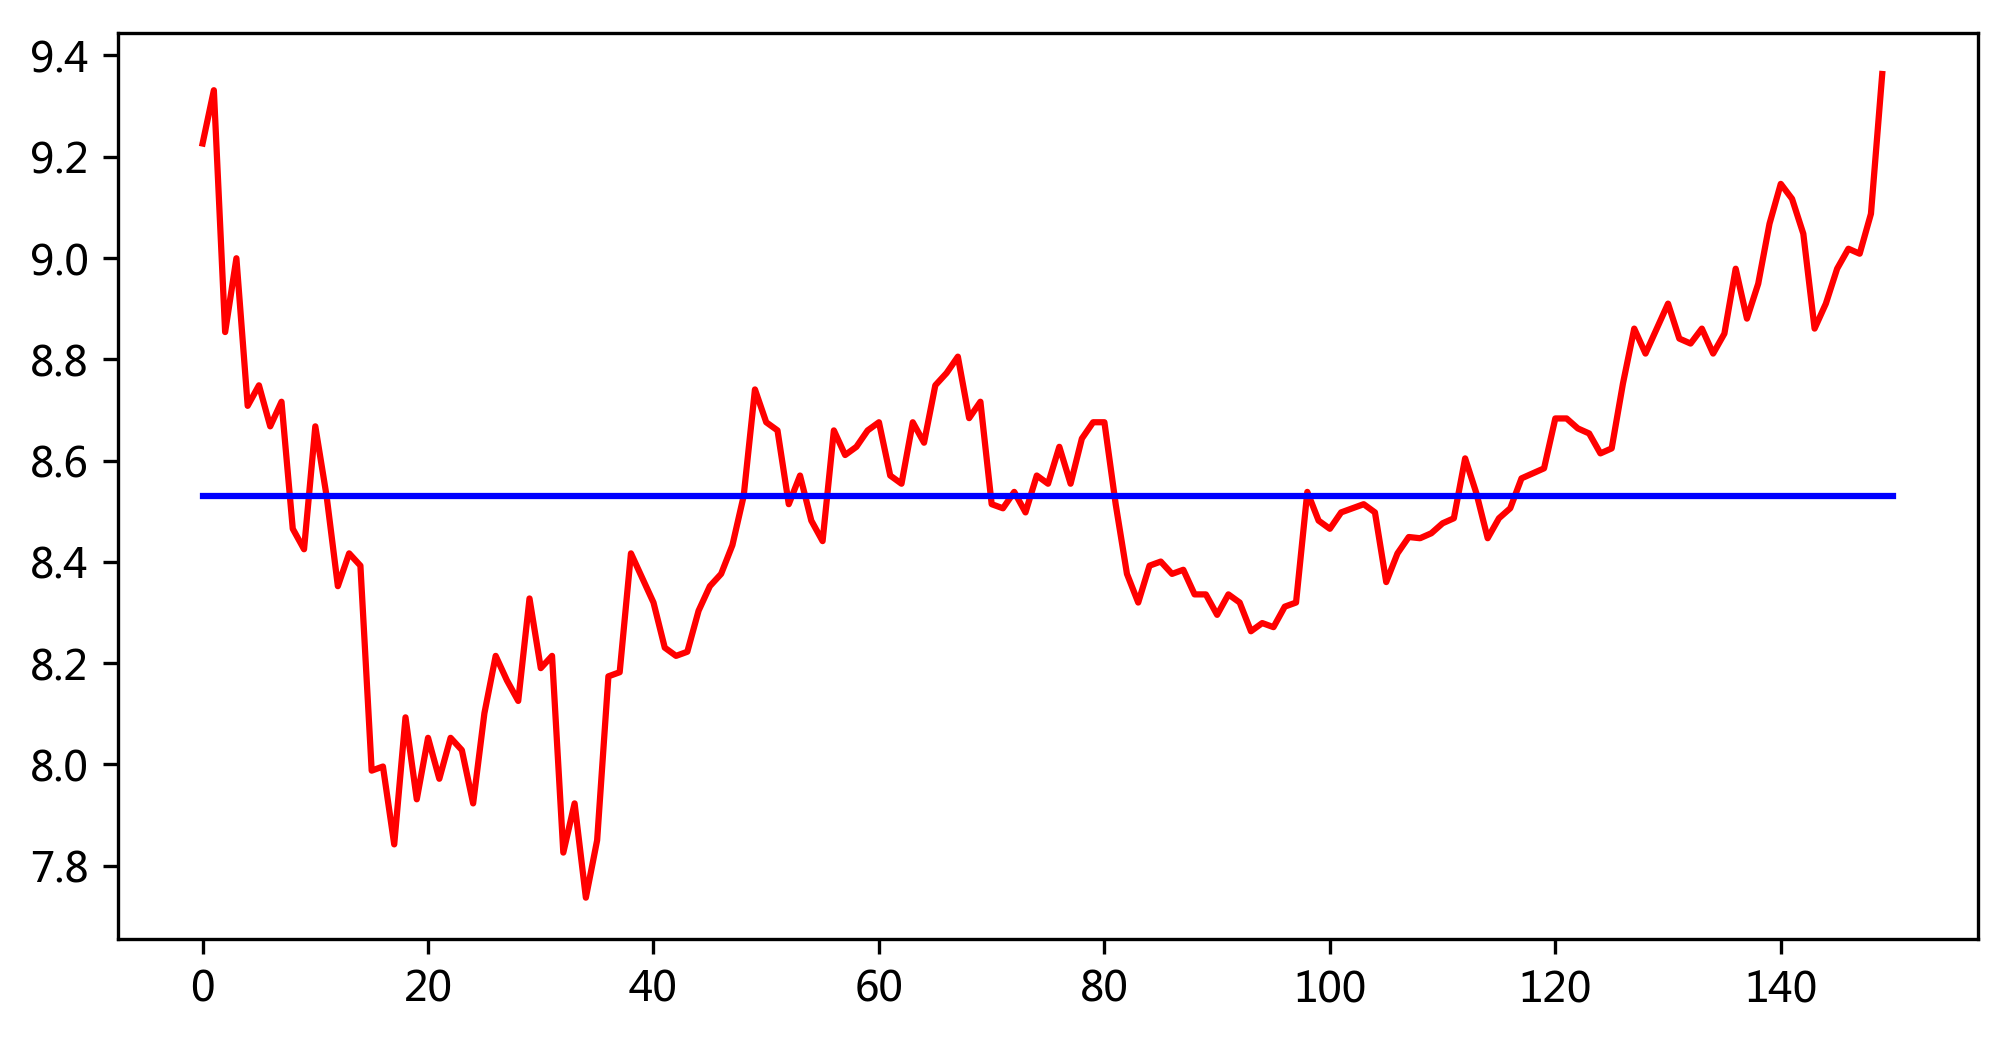

In [10]:

class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        self.rnn_a = nn.RNN(1,1,1)
        self.rnn_b = nn.RNN(1,1,1)
        self.linear = nn.Linear(1,1)
    def forward(self,input,hn):
        outs,hn = self.rnn_a(input,hn) 
        out,hn = self.rnn_b(outs[-1].view(-1,1,1),hn)
            ###方法一
        outs = torch.cat((outs,out),0)
            ###方法二   
            #out = []
            #for i in range(outs.size(0)):
            #    out.append(self.linear(outs[i,:].view(-1,1)))

            #return torch.stack(out, dim=0),h_state

        out = self.linear(outs.view(-1,1))
        return out,hn
rnn = RNN()  
optimizer = torch.optim.Adam(rnn.parameters(),lr = 0.02)
loss_func = nn.MSELoss()
h0 = Variable(torch.zeros(1,1,1))
    
input = Variable(torch.from_numpy(train_data)).type(torch.FloatTensor)
test = Variable(torch.from_numpy(test_data)).type(torch.FloatTensor)
input = input.view(-1,1,1) 
test = test.view(-1,1)

print(rnn.state_dict().keys())  
for key in rnn.state_dict():#模型参数  
    print(key, 'corresponds to', list(rnn.state_dict()[key]) ) 
for i in range(22222):
    out,h_state = rnn(input,h0) 
 
    h_state = Variable(h_state.data) 
    loss = loss_func(out,test)   
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step() 
    optimizer.zero_grad()                   # clear gradients for this training step
steps1 = np.arange(0,150)
steps2 = np.arange(0,151)
input = input.view(-1)
            
plt.figure(1,figsize=(8,4),dpi=300) 
plt.plot(steps1,input.data.numpy().flatten() , 'r-')
plt.plot(steps2, out.data.numpy().flatten(), 'b-')

plt.draw()
plt.ioff()
plt.show()   


In [11]:
torch.save(rnn.state_dict(), 'net_params.pkl')   # save only the parameters

torch.save(rnn, 'net2.pkl')

/usr/local/lib/python3.6/site-packages/torch/serialization.py:158: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [12]:
rnn.load_state_dict(torch.load('net_params.pkl'))
print(list(rnn.state_dict()[key]))

[3.845346212387085]


In [13]:
for key in rnn.state_dict():#模型参数  
    print(key, 'corresponds to', list(rnn.state_dict()[key]) )
    

rnn_a.weight_ih_l0 corresponds to [
 1.1737
[torch.FloatTensor of size 1]
]
rnn_a.weight_hh_l0 corresponds to [
 0.3072
[torch.FloatTensor of size 1]
]
rnn_a.bias_ih_l0 corresponds to [0.08177805691957474]
rnn_a.bias_hh_l0 corresponds to [0.2440221905708313]
rnn_b.weight_ih_l0 corresponds to [
 2.6406
[torch.FloatTensor of size 1]
]
rnn_b.weight_hh_l0 corresponds to [
 3.0189
[torch.FloatTensor of size 1]
]
rnn_b.bias_ih_l0 corresponds to [1.5353776216506958]
rnn_b.bias_hh_l0 corresponds to [1.8200098276138306]
linear.weight corresponds to [
 4.6846
[torch.FloatTensor of size 1]
]
linear.bias corresponds to [3.845346212387085]


<built-in method size of torch.FloatTensor object at 0x7f75d46eca88>
out============================= Variable containing:
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.5299
 8.52

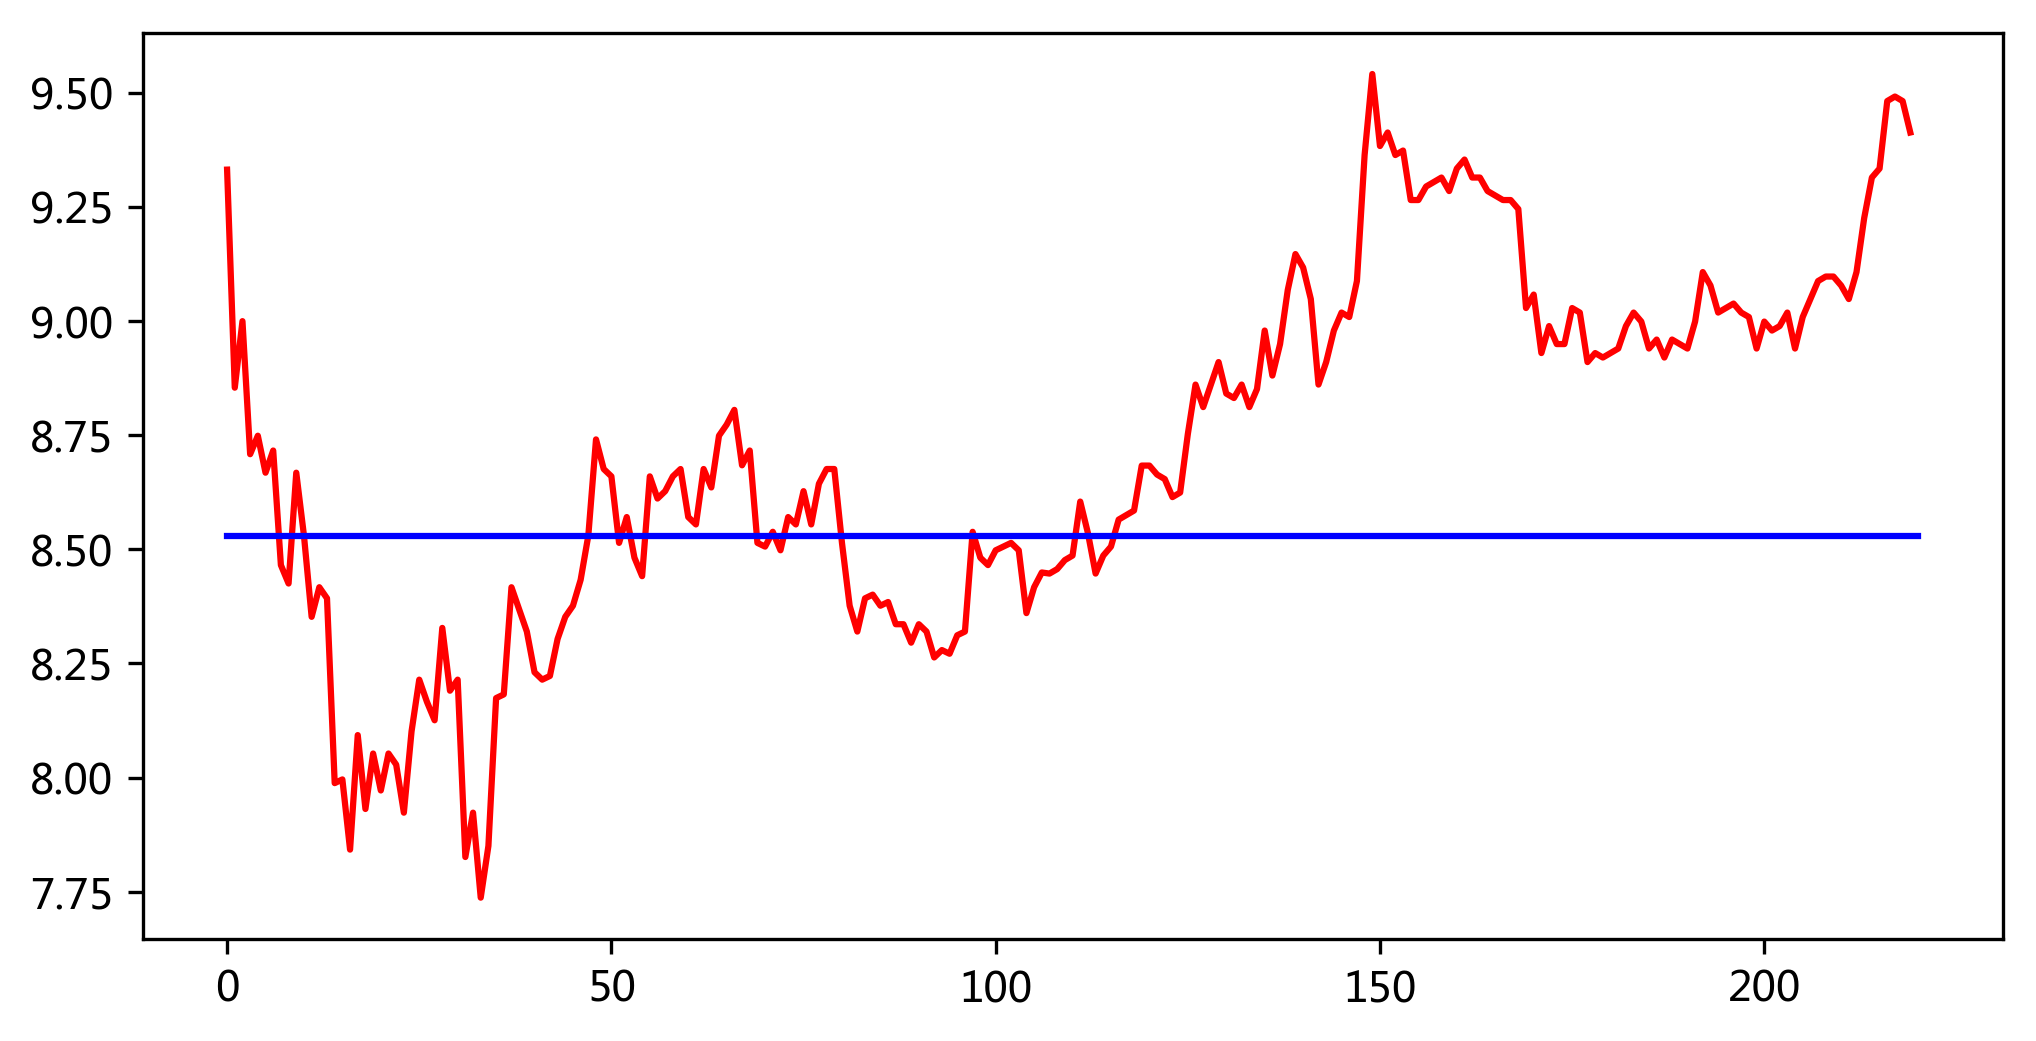

In [14]:
input2 = Variable(torch.from_numpy(train_data2)).type(torch.FloatTensor)
print(input2.size)
input2 = input2.view(-1,1,1)
out,h_state = rnn(input2,h0) 
print('out=============================',out)
                  # clear gradients for this training step
steps1 = np.arange(0,220)
steps2 = np.arange(0,221)
            
plt.figure(1,figsize=(8,4),dpi=300) 
plt.plot(steps1,input2.data.numpy().flatten() , 'r-')
plt.plot(steps2, out.data.numpy().flatten(), 'b-')

plt.draw()
plt.ioff()
plt.show()   
